# Interpolating Multi-Dimensional Data

In this tutorial, we will be using Kadlu to interpolate multi-dimensional data arrays. In particular, we will show how to interpolate, unstructured bathymetric data using Kadlu's `Interpolator2D` class. 

As always, we begin by importing all necessary modules, classes, functions, etc.

In [1]:
import kadlu
#from kadlu.geospatial.interpolation import Interpolator2D

from datetime import datetime
import matplotlib.pyplot as plt

For this tutorial we consider bathymetric data from the General Bathymetric Chart of the Oceans (GEBCO) for geographic region $47^o$N to $49^o$N and $-63^o$W to $-61^o$W:

In [2]:
# load some data to interpolate
bathy, lat, lon = kadlu.load(
        var='bathymetry', source='gebco',
        south=47, west=-63, 
        north=49, east=-61
    )

loading data from The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
GEBCO bathymetry  logged 0 points in region	{"east": "-62", "north": "48", "south": "46", "west": "-64"}
loading data from The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
GEBCO bathymetry  logged 0 points in region	{"east": "-62", "north": "50", "south": "48", "west": "-64"}
loading data from The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
GEBCO bathymetry  logged 0 points in region	{"east": "-60", "north": "48", "south": "46", "west": "-62"}
loading data from The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
GEBCO bathymetry  logged 0 points in region	{"east": "-60", "north": "50", "south": "48", "west": "-62"}


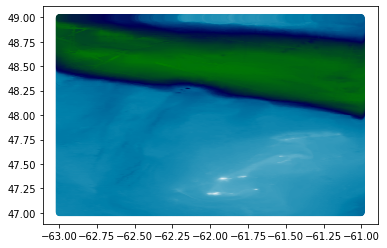

In [3]:
# quick overview of bathymetric data
fig = plt.scatter(lon, lat, c=bathy, cmap=plt.cm.ocean_r)

In [4]:
bathy[-100], lon[-100],lat[-100]

(75.0, -61.41458333333334, 48.99791666666667)

In order to interpolate the bathymetric data, we initialize an instance of the `Interpolator2D` class. (Note that Kadlu also has a `Interpolator3D` class for three-dimensional data arrays, such as temperature and salinity, which depend not only on latitude and longitude, but also on depth.)

In [5]:
interpolator = kadlu.Interpolator2D(values=bathy, lats=lat, lons=lon)  # create interpolator

Now, we can use the interpolator to query for approximate bathymetric values at any set of coordinate pairs. For example, the query

In [6]:
interpolator.interp(lat=[47.5, 48, 48.5], lon=[-62.5, -62, -61.5]) 

array([ 77.76332276,  60.55056889, 416.36491996])

returns the bathymetric values, i.e., the elevation of the seafloor, at the coordinates ($47.5^{\circ}$N,$-62.5^{\circ}$W), ($48.0^{\circ}$N,$-62.0^{\circ}$W) and ($48.5^{\circ}$N,$-61.5^{\circ}$W).

One can also query on a regular coordinate grid, using the grid keyword argument,

In [7]:
interpolator.interp(lat=[47, 47.5, 48, 48.5, 49], lon=[-62.5, -62], grid=True)

array([[ 66.59207795,  51.31968539],
       [ 77.76332276,  28.87720819],
       [ 76.86879183,  60.55056889],
       [395.01666702, 432.36411256],
       [211.07623111,  47.04745949]])